# Introducción

Introducción: La plataforma airbnb les pidió **ayuda para predecir los precios de los hospedajes para algunas ciudades dentro de USA**. Para ellos se les presentará un dataset con un listado de 19.309 publicaciones con 29  variables que muestran algunas características de las propiedades.


**Variables:**
*   ID: Identificado de la publicacion
*   Property_type: tipo de propiedad
*   room_type: tipo de habitacion
*   amenities: amenities que tiene la propiedad
*   bathrooms: cantidad de baños
*   bed_type: tipo de cama
*   cancellation policy: politica de cancelacion
*   cleaning_free: si tiene un cargo por limpieza o no
*   city: ciudad
*   description: descripcion de la publicacion
*   first_review: Fecha de la primera review
*   host_has_profile_pic: Si el host tiene foto de perfil o no
*   host_identity_verified: Si el host es verificado por la página o no
*   host_response_rate: Frecuencia de respuesta del host
*   host_since: Fecha desde que el host se inicio en airbnb
*   instant_bookable: Si la propiedad se puede reservar de manera instantanea o requiere aprobación del dueño
*   last_review: fecha dela ultima review
*   latitude: Latitud geográfica de la propiedad
*   longitude: Longitud geográfica de la propiedad
*   name: Nombre de la publicacion
*   neighbourhood: barrio de la propiedad
*   number_of_reviews: cantidad de reviews de la publicacion
*   review_scores_rating: puntaje de la publicacion
*   thumbnail_url: URL de la publicacion
*   zipcode: codigo postal de la propiedad
*   bedrooms: cantidad de cuartos
*   beds: cantidad de camas







# Importamos las librerías

In [ ]:
# Importo librerías de maniupulación de datos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

In [ ]:
# Importo librerías de Aprendizaje automático
from sklearn import preprocessing
from sklearn import svm,datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR, LinearSVR
from sklearn.model_selection import GridSearchCV

# Importamos el dataframe y observamos los datos

In [ ]:
#Importamos el archivo 'airbnb_us', en base al cual realizaremos el análisis.

file_id = '1iSOYw0i0YfPUaF6-CfAbE3Trl3vRQIvc'  # Creamos un File ID
file_name = 'airbnb_us.csv' # Nombramos el archivo
gdown.download(f'https://drive.google.com/uc?id={file_id}', file_name, quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1iSOYw0i0YfPUaF6-CfAbE3Trl3vRQIvc
To: /content/airbnb_us.csv
100%|██████████| 27.4M/27.4M [00:01<00:00, 26.2MB/s]


'airbnb_us.csv'

In [ ]:
# Leemos el archivo con pandas
airbnb_df = pd.read_csv('airbnb_us.csv')
airbnb_df.head()

print(f'np.shape --> {np.shape(airbnb_df)}')

filas = np.shape(airbnb_df)[0] # [0] para la primera dimension
print(f'Filas: {filas}')

columnas = np.shape(airbnb_df)[1] # [1] para la segunda dimension
print(f'Columnas: {columnas}')

print('Output de ".head(5)": ')
airbnb_df.head(5)

np.shape --> (19309, 29)
Filas: 19309
Columnas: 29
Output de ".head(5)": 


id property_type        room_type  \
0  13418779         House  Entire home/apt   
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   

                                           amenities  accommodates  bathrooms  \
0  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4        1.0   
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   

   bed_type cancellation_policy  cleaning_fee city  ...   longitude  \
0  Real Bed            flexible          True   SF  ... -122.431619   
1  Real Bed            moderate          True   DC  ...  -77.034596   
2  Real Bed              strict          True   SF  ... -122.429526   
3  Real Bed            moderate          True   SF  ... -122.501095   
4  Real Bed              strict          True   DC  ...  -77.031189   

                                                name      neighbourhood  \
0                 Beautiful Flat in the Heart of SF!       Lower Haight   
1                         Great studio in midtown DC   Columbia Heights   
2                        Comfort Suite San Francisco         Noe Valley   
3                 Cozy Garden Studio - Private Entry  Richmond District   
4  Charming 2 bdrm in trendy U/14th streets w/par...  U Street Corridor   

  number_of_reviews review_scores_rating  \
0                 0                  NaN   
1                 4                 40.0   
2                 3                100.0   
3               159                 99.0   
4                13                 89.0   

                                       thumbnail_url  zipcode bedrooms  beds  \
0  https://a0.muscache.com/im/pictures/72208dad-9...  94117.0      2.0   2.0   
1                                                NaN    20009      0.0   1.0   
2  https://a0.muscache.com/im/pictures/82509143-4...    94131      1.0   1.0   
3  https://a0.muscache.com/im/pictures/0ed6c128-7...    94121      1.0   1.0   
4                                                NaN    20009      2.0   3.0   

   price  
0  750.0  
1  115.0  
2   85.0  
3  120.0  
4  200.0  

[5 rows x 29 columns]

In [ ]:
airbnb_df.describe().T

count          mean           std         min  \
id                    19309.0  1.121819e+07  6.105064e+06  941.000000   
accommodates          19309.0  3.426485e+00  2.204776e+00    1.000000   
bathrooms             19274.0  1.276201e+00  5.867133e-01    0.000000   
latitude              19309.0  3.972335e+01  1.902391e+00   37.704743   
longitude             19309.0 -9.313568e+01  2.134489e+01 -122.511500   
number_of_reviews     19309.0  2.508670e+01  4.434838e+01    0.000000   
review_scores_rating  15175.0  9.472237e+01  7.097521e+00   20.000000   
bedrooms              19292.0  1.361290e+00  9.012116e-01    0.000000   
beds                  19285.0  1.788800e+00  1.247000e+00    0.000000   
price                 19309.0  1.952255e+02  2.021842e+02   10.000000   

                               25%           50%           75%           max  
id                    6.211289e+06  1.215601e+07  1.639470e+07  2.121545e+07  
accommodates          2.000000e+00  3.000000e+00  4.000000e+00  1.600000e+01  
bathrooms             1.000000e+00  1.000000e+00  1.500000e+00  8.000000e+00  
latitude              3.778427e+01  3.891502e+01  4.192686e+01  4.239044e+01  
longitude            -1.224134e+02 -8.762574e+01 -7.699888e+01 -7.098505e+01  
number_of_reviews     1.000000e+00  7.000000e+00  2.800000e+01  5.420000e+02  
review_scores_rating  9.300000e+01  9.700000e+01  1.000000e+02  1.000000e+02  
bedrooms              1.000000e+00  1.000000e+00  2.000000e+00  1.000000e+01  
beds                  1.000000e+00  1.000000e+00  2.000000e+00  1.600000e+01  
price                 8.700000e+01  1.350000e+02  2.200000e+02  1.999000e+03

In [ ]:
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19309 entries, 0 to 19308
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      19309 non-null  int64  
 1   property_type           19309 non-null  object 
 2   room_type               19309 non-null  object 
 3   amenities               19309 non-null  object 
 4   accommodates            19309 non-null  int64  
 5   bathrooms               19274 non-null  float64
 6   bed_type                19309 non-null  object 
 7   cancellation_policy     19309 non-null  object 
 8   cleaning_fee            19309 non-null  bool   
 9   city                    19309 non-null  object 
 10  description             19309 non-null  object 
 11  first_review            15355 non-null  object 
 12  host_has_profile_pic    19306 non-null  object 
 13  host_identity_verified  19306 non-null  object 
 14  host_response_rate      15013 non-null

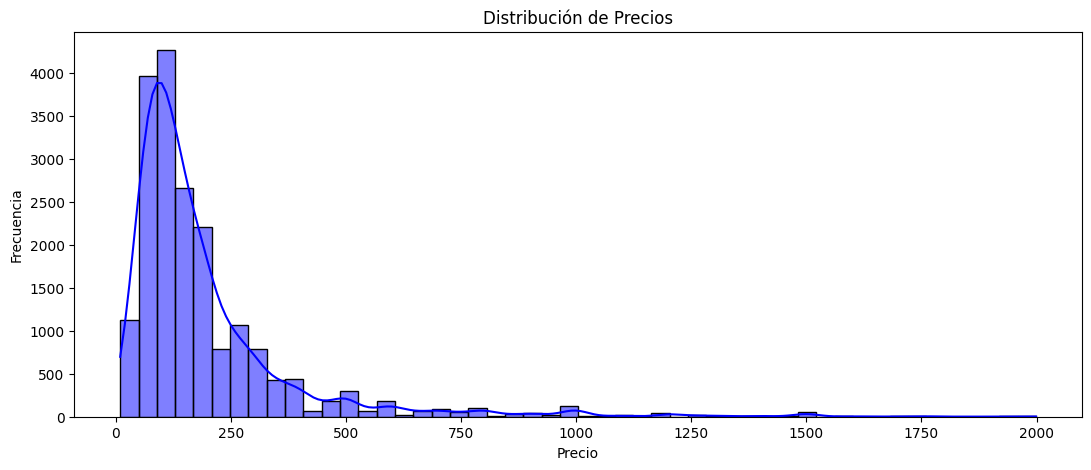

In [ ]:
# Distribución de la variable objetivo (Price)
plt.figure(figsize=(13, 5))
sns.histplot(airbnb_df['price'], kde=True, bins=50, color='blue')
plt.title("Distribución de Precios")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

<ipython-input-8-84bedba2efac>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='city', data=airbnb_df, order=airbnb_df['city'].value_counts().index, palette = 'pastel')


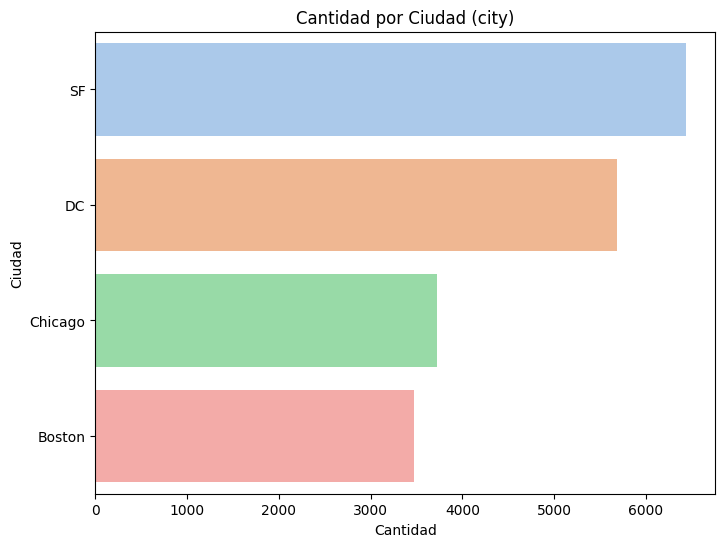

In [ ]:
# Frecuencia de las categorías principales para Room Type
plt.figure(figsize=(8, 6))
sns.countplot(y='city', data=airbnb_df, order=airbnb_df['city'].value_counts().index, palette = 'pastel')
plt.title("Cantidad por Ciudad (city)")
plt.xlabel("Cantidad")
plt.ylabel("Ciudad")
plt.show()

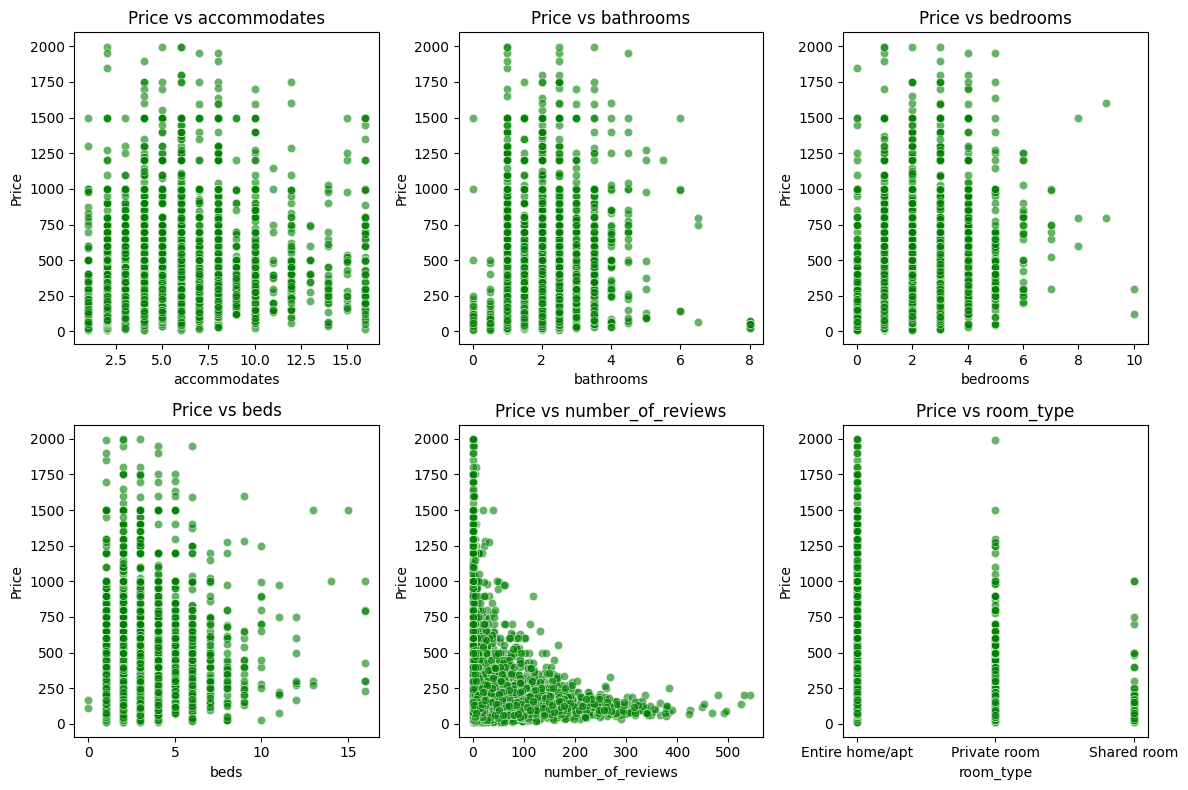

In [ ]:
# Relación entre Price y otras variables numéricas
numeric_vars = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'number_of_reviews', 'room_type']

plt.figure(figsize=(12, 8))
for i, var in enumerate(numeric_vars, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=var, y='price', data=airbnb_df, alpha=0.6, color='green')
    plt.title(f"Price vs {var}")
    plt.xlabel(var)
    plt.ylabel("Price")
plt.tight_layout()
plt.show()

# Manipulación de los features

En base a la información del dataset convertimos las variables con el tipo de dato que les correspondería para su correcta manipulación:


* first_review, host_since, last_review --> date
* cleaninig_fee, instant_bookable, host_identity_verified, host_has_profie_pic --> boolean.
* host_response_rate --> float.

In [ ]:
#Eliminamos la columna name y thumbnail_url porque no son relevantes al modelo
airbnb_df = airbnb_df.drop(['name','host_has_profile_pic','thumbnail_url'], axis=1)

In [ ]:
# Convertimos las columnas de fechas
date_columns = ['first_review', 'host_since']
for col in date_columns:
    airbnb_df[col] = pd.to_datetime(airbnb_df[col], errors='coerce')

# Convertimos las columnas booleanas
# cleaning_fee: TRUE/FALSE --> True/False
airbnb_df['cleaning_fee'] = airbnb_df['cleaning_fee'].map({'TRUE': True, 'FALSE': False}).astype(bool)

# instant_bookable, host_identity_verified, host_has_profile_picture: t/f --> True/False
bool_columns = ['instant_bookable', 'host_identity_verified']
for col in bool_columns:
    airbnb_df[col] = airbnb_df[col].map({'t': True, 'f': False}).astype(bool)

# Convertimos host_response_rate a float (ejemplo: '92%' --> 0.92)
airbnb_df['host_response_rate'] = (
    airbnb_df['host_response_rate']
    .str.replace('%', '', regex=False)  # Eliminamos el símbolo '%'
    .astype(float) / 100  # Convertimos a decimal
)

# Verificamos el resultado de las conversiones
print(airbnb_df.dtypes)
print(airbnb_df.head())

id                                 int64
property_type                     object
room_type                         object
amenities                         object
accommodates                       int64
bathrooms                        float64
bed_type                          object
cancellation_policy               object
cleaning_fee                        bool
city                              object
description                       object
first_review              datetime64[ns]
host_identity_verified              bool
host_response_rate               float64
host_since                datetime64[ns]
instant_bookable                    bool
last_review                       object
latitude                         float64
longitude                        float64
neighbourhood                     object
number_of_reviews                  int64
review_scores_rating             float64
zipcode                           object
bedrooms                         float64
beds            

<ipython-input-12-0d9f569076bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='room_type', data=airbnb_df, order=airbnb_df['room_type'].value_counts().index, palette = 'pastel')


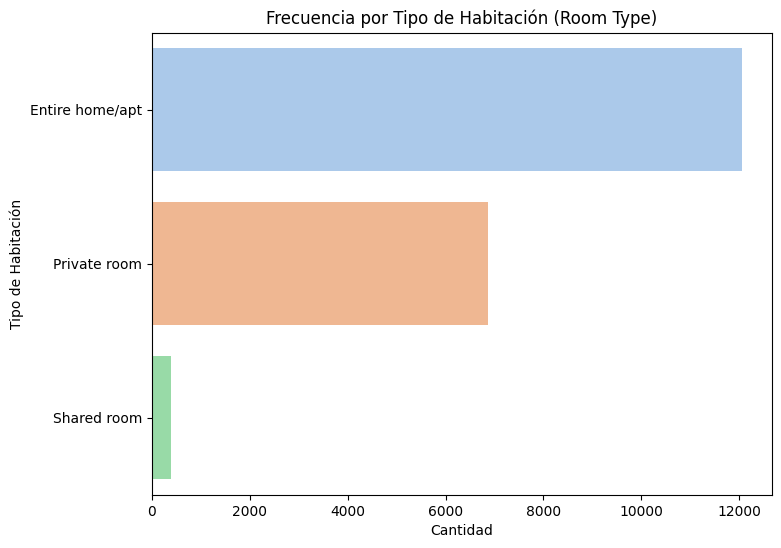

In [ ]:
#Frecuencia de las categorías principales para Room Type
plt.figure(figsize=(8, 6))
sns.countplot(y='room_type', data=airbnb_df, order=airbnb_df['room_type'].value_counts().index, palette = 'pastel')
plt.title("Frecuencia por Tipo de Habitación (Room Type)")
plt.xlabel("Cantidad")
plt.ylabel("Tipo de Habitación")
plt.show()

<ipython-input-13-dd2f5d5c3e10>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.catplot(data=airbnb_df,


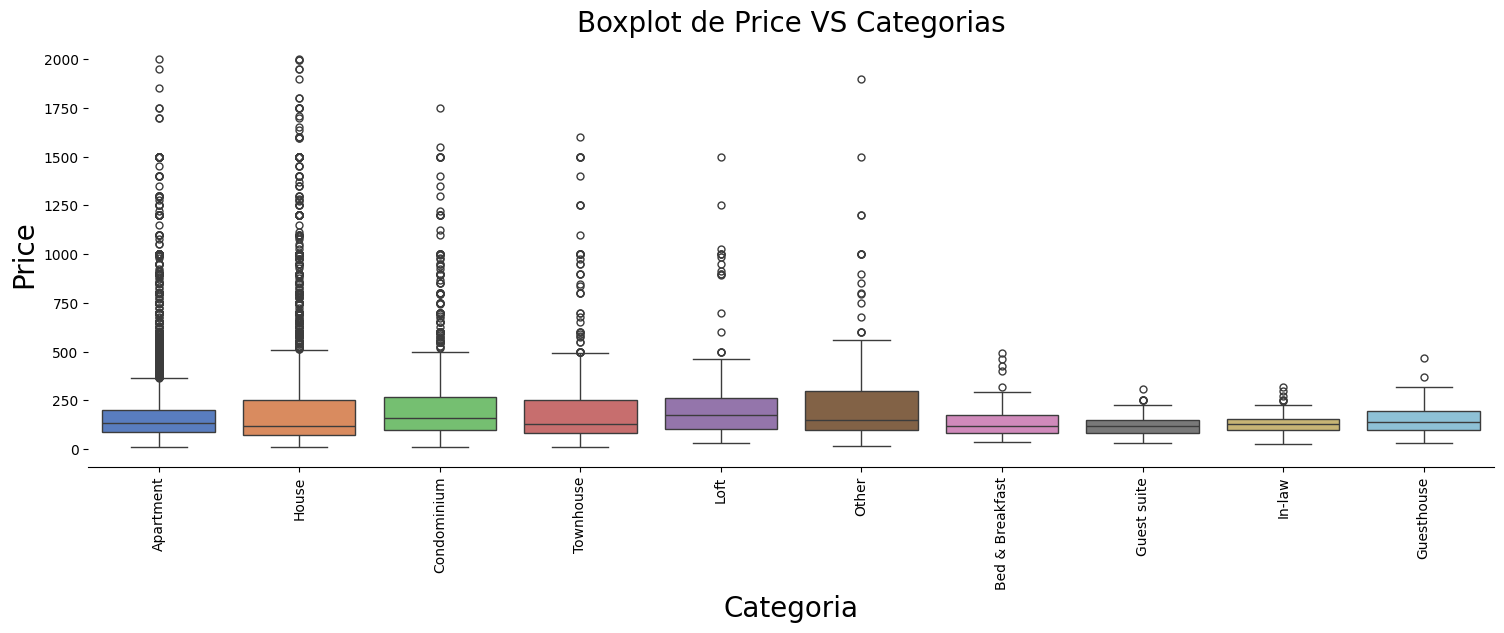

In [ ]:
# Definir idx_top como las 10 categorías más frecuentes de 'property_type'
idx_top = airbnb_df['property_type'].value_counts().index[:10]

# Todas las categorias
g = sns.catplot(data=airbnb_df,
                x="property_type",y="price",
                kind="box",
                order=idx_top,
                palette = "muted",
                height = 5 ,aspect=3)

g.despine(left=True) # Para quitar linea del Y del plot
g.set_xticklabels(rotation=90)
plt.xlabel("Categoria",size = 20)
plt.ylabel("Price",size = 20)
plt.title('Boxplot de Price VS Categorias',size = 20)
plt.show()

In [ ]:
# Guardamos en una variable la cantidad de categorias
q_cat_prop_type = len(airbnb_df['property_type'].unique())
print(f'En total hay {q_cat_prop_type} categorias\r\n')
# Mostramos los tipos de categorias
print("\n", airbnb_df['property_type'].unique())

En total hay 27 categorias


 ['House' 'Apartment' 'Loft' 'Townhouse' 'Condominium' 'Bungalow'
 'Guesthouse' 'Dorm' 'Other' 'Bed & Breakfast' 'Boutique hotel' 'Hostel'
 'In-law' 'Boat' 'Guest suite' 'Castle' 'Timeshare' 'Camper/RV' 'Cabin'
 'Serviced apartment' 'Treehouse' 'Villa' 'Yurt' 'Tent' 'Train'
 'Vacation home' 'Cave']


Gráficamos la distribución de los tipos de propiedad con un gráfico de barras y mostramos como se relacionan con la variable precio. Esto nos permitira entender como se distribuye esta ultima variable y ver si existen ourliers

<ipython-input-15-f1eebf7f0b5f>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(data=airbnb_df,
<ipython-input-15-f1eebf7f0b5f>:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")


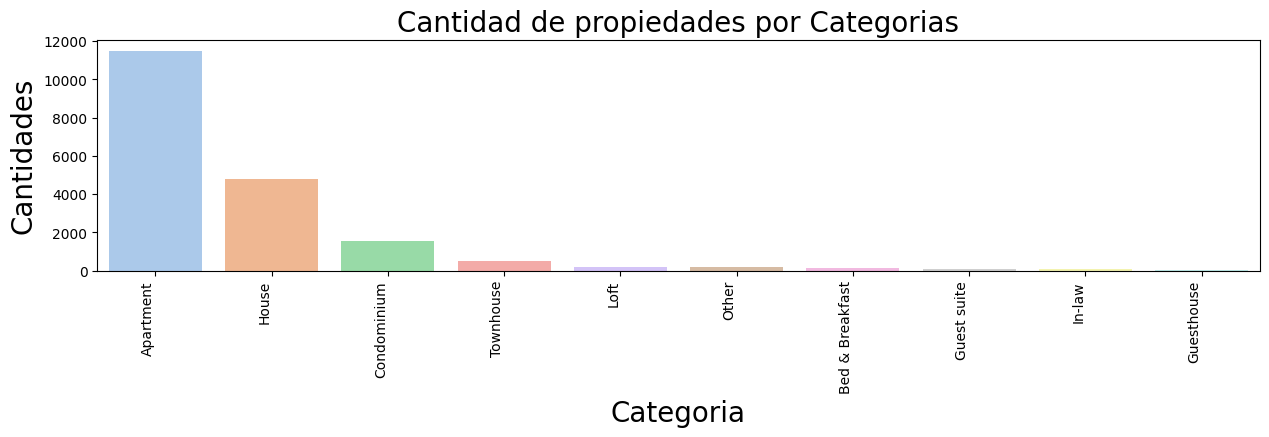

In [ ]:
# top
top_n = 10
# Guardamos los indices de los top_n categorias
idx_top = airbnb_df['property_type'].value_counts(ascending=False).index[0:top_n]

plt.figure(figsize=(15,3))
# Indicamos la columna 'Category', de los datos 'google_df', en el orden 'idx_top'
g = sns.countplot(data=airbnb_df,
                  x="property_type",
                  order=idx_top,
                  palette = "pastel")
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
plt.title('Cantidad de propiedades por Categorias', size = 20)
plt.xlabel("Categoria", size = 20)
plt.ylabel("Cantidades", size = 20)
plt.show()

<ipython-input-16-b5b66ac77311>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("viridis", len(room_types))  # Utilizamos una paleta de colores


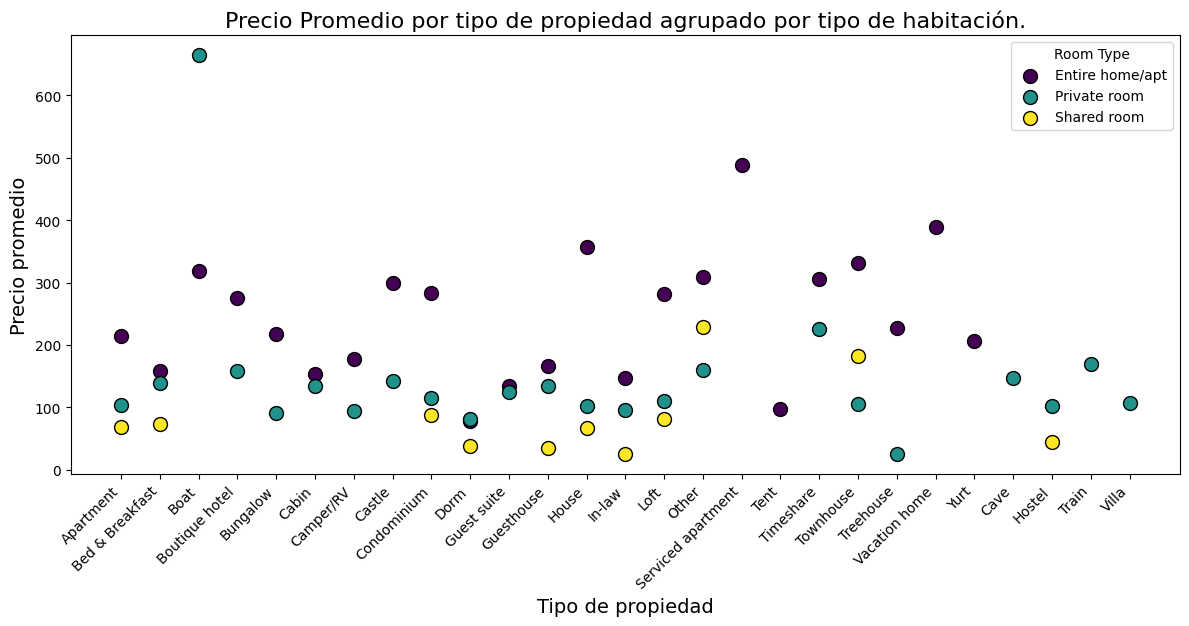

In [ ]:
#Verificamos uqe 'price' sea una variable numerica
airbnb_df['price'] = pd.to_numeric(airbnb_df['price'], errors='coerce')

# Agrupamos por 'room_type' y 'property_type' y calculamos la media de 'price'
grouped = airbnb_df.groupby(['room_type', 'property_type'])['price'].mean().reset_index()

# Cremos un scatter plot
plt.figure(figsize=(12, 6))

# Creamos un scatter plot para cada tipo de habitación
room_types = grouped['room_type'].unique()
colors = plt.cm.get_cmap("viridis", len(room_types))  # Utilizamos una paleta de colores
for i, room_type in enumerate(room_types):
    data = grouped[grouped['room_type'] == room_type]
    plt.scatter(data['property_type'], data['price'], label=room_type,
                color=colors(i), s=100, edgecolors='black')

# Etiquetas y formato
plt.xticks(rotation=45, ha="right")
plt.xlabel('Tipo de propiedad', size=14)
plt.ylabel('Precio promedio', size=14)
plt.title('Precio Promedio por tipo de propiedad agrupado por tipo de habitación.', size=16)
plt.legend(title='Room Type')
plt.tight_layout()

# Aumentamos espacio en la parte inferior para evitar superposición
plt.subplots_adjust(bottom=0.2)

# Mostramos el gráfico
plt.show()

# Manipulación de Outliers

In [ ]:
# Calculamos el percentil 97 y el percentil 1 de la columna 'price'
percentil_95 = airbnb_df['price'].quantile(0.95)
percentil_01 = airbnb_df['price'].quantile(0.01)

# Mostrar los valores de los percentiles
print(f"El valor del percentil 97 es: {percentil_95}")
print(f"El valor del percentil 1 es: {percentil_01}")

# Contar la cantidad de valores por encima del percentil 95
valores_por_encima_95 = len(airbnb_df[airbnb_df['price'] > percentil_95])
print(f"Cantidad de valores por encima del percentil 95: {valores_por_encima_95}")

# Contar la cantidad de valores por debajo del percentil 01
valores_por_debajo_01 = len(airbnb_df[airbnb_df['price'] < percentil_01])
print(f"Cantidad de valores por debajo del percentil 1: {valores_por_debajo_01}")


El valor del percentil 97 es: 564.5999999999988
El valor del percentil 1 es: 28.99999999999999
Cantidad de valores por encima del percentil 95: 966
Cantidad de valores por debajo del percentil 1: 172


Teniendo en cuenta estos valores, calculamos los limites inferior y superior para entender la relacion con los outliers

In [ ]:
Q1 = airbnb_df['price'].quantile(0.25)
Q3 = airbnb_df['price'].quantile(0.75)
IQR = Q3 - Q1

#Calculamos los límites inferior y superior
lower_bound = Q1 - 0.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("limite_inferior:",lower_bound)
print("limite_superior:",upper_bound)

limite_inferior: 20.49999999999976
limite_superior: 419.50000000000125


En el limite inferior utilizamos 0.5 dado que si utilizabamos 1.5 tomaba un valor negativo lo cual no tenia sentido para el analisis.

Decidimos eliminar los outliers para evitar sobreajustar el modelo.

In [ ]:
# Nos vamos a quedar con los registros que esten entre estos valores

airbnb_df = airbnb_df[(airbnb_df['price'] > percentil_01) & (airbnb_df['price'] < percentil_95)]
airbnb_df.shape

(18142, 26)

# Manipulación de nulos

<ipython-input-20-59b4d3894392>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.head(10), y=missing_values.head(10).index, palette = 'pastel')


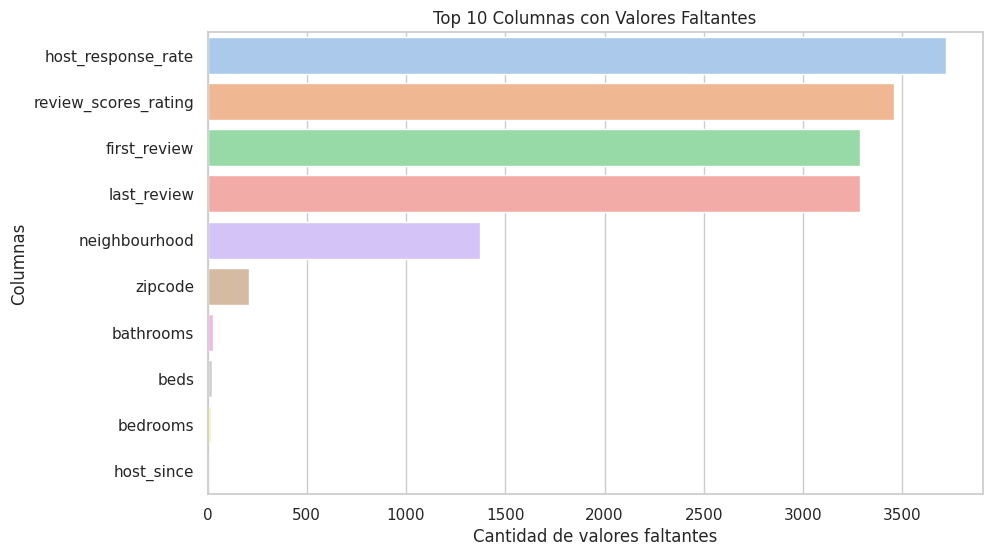

In [ ]:
# Consifuramos el estilo de la visualización
sns.set(style="whitegrid")

# Analizamos los valores faltantes
missing_values = airbnb_df.isnull().sum().sort_values(ascending=False)

# Visualizamos los valores faltantes
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.head(10), y=missing_values.head(10).index, palette = 'pastel')
plt.title("Top 10 Columnas con Valores Faltantes")
plt.xlabel("Cantidad de valores faltantes")
plt.ylabel("Columnas")
plt.show()

In [ ]:
#Con la funcion '.isnull' vemos si alguna de las columnas tiene algun valor nulo y con '.sum' le pedimos que nos cuente cuantos datos nulos tiene cada variable.
#Dependiendo de la cantidad de nulos podremos decidir que hacer
null = airbnb_df.isnull().sum()
null

id                           0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                   30
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
description                  0
first_review              3286
host_identity_verified       0
host_response_rate        3718
host_since                   3
instant_bookable             0
last_review               3286
latitude                     0
longitude                    0
neighbourhood             1374
number_of_reviews            0
review_scores_rating      3459
zipcode                    210
bedrooms                    17
beds                        21
price                        0
dtype: int64

Aclaración de *host_response_rate* y *last_review*

> Estas dos features no representan información relevante al modelo como para eliminar samples debido a valores NaN, es por esto que estas feature no serán tomadas para el análisis futuro, eliminandolás del *data frame*

In [ ]:
#Eliminamos la columna host_response_rate y last_review porque no es relevante al modelo
airbnb_df = airbnb_df.drop(['host_response_rate','last_review'], axis=1)

Aclaración de *host_since*

Para popular esta variable tomaremos como referencia la first review donde esté disponible, a su vez, en algunos registros, la fecha de ‘first_review’ puede ser anterior a ‘host_since’. En esos casos, actualizamos la fecha de ‘first_review’ para que sea igual a ‘host_since’ en estos casos. Si las fechas fueron leídas en el orden incorrecto (es decir, first_review > host_since), intercambiar los valores de las columnas ‘first_review’ y ‘host_since’. Luego de popular los valores de ‘host_since’, eliminamos la variable ‘first_review’.



In [ ]:
# Rellenamos 'host_since' con 'first_review' si 'host_since' es nulo
airbnb_df['host_since'] = airbnb_df['host_since'].fillna(airbnb_df['first_review'])

# Identificamos y corregimos casos donde las fechas están en orden incorrecto
mask_swap = airbnb_df['first_review'] < airbnb_df['host_since']
airbnb_df.loc[mask_swap, ['first_review', 'host_since']] = airbnb_df.loc[mask_swap, ['host_since', 'first_review']].values

# Validamos el resultado
print(airbnb_df[['first_review', 'host_since']].head())

# Verificamos si quedan valores nulos en 'host_since' y 'first_review'
print(f"Valores nulos en host_since: {airbnb_df['host_since'].isnull().sum()}")
print(f"Valores nulos en first_review: {airbnb_df['first_review'].isnull().sum()}")


  first_review host_since
1   2015-05-12 2015-03-01
2   2017-08-27 2017-06-07
3   2016-02-13 2015-06-04
4   2017-02-18 2012-10-12
5          NaT 2012-09-10
Valores nulos en host_since: 0
Valores nulos en first_review: 3286


In [ ]:
#Eliminamos la columna first_review porque ya fué utilizada para nivelar el feature host_since
airbnb_df = airbnb_df.drop(['first_review'], axis=1)

In [ ]:
airbnb_df.shape

(18142, 23)

Aclaración de *reviews_score_rating*

> Para los missing values, en vez de eliminar aquellas filas que contengan nulos, se optará por reemplazarlo por el valor medio del feature.

In [ ]:
# Calculamos la media de review_scores_rating (ignorando valores nulos)
mean_rating = airbnb_df['review_scores_rating'].mean()

# Rellenamos valores nulos en review_scores_rating con la media calculada
airbnb_df['review_scores_rating'] = airbnb_df['review_scores_rating'].fillna(mean_rating)

# Validamos que ya no haya valores nulos en review_score_rating
print(f"Valores nulos en review_scores_rating: {airbnb_df['review_scores_rating'].isnull().sum()}")


Valores nulos en review_scores_rating: 0


neighborhood y zipcode

Popularemos los valores nulas, según el zipcode. Las variables que no posean ‘zipcode’ ni ‘neighborhood’ serán eliminadas.

In [ ]:
# Verificar si las columnas 'neighbourhood' y 'zipcode' están presentes
if 'neighbourhood' not in airbnb_df.columns or 'zipcode' not in airbnb_df.columns:
    raise ValueError("Las columnas 'neighbourhood' y 'zipcode' son necesarias en el DataFrame.")

# 1. Eliminar filas con ambos valores nulos
eliminadas = airbnb_df[airbnb_df['neighbourhood'].isnull() & airbnb_df['zipcode'].isnull()]
print(f"Filas eliminadas con 'neighbourhood' y 'zipcode' nulos: {len(eliminadas)}")

# Eliminar filas con 'neighbourhood' y 'zipcode' nulos
airbnb_df = airbnb_df.dropna(subset=['neighbourhood', 'zipcode'], how='all')

# 2. Agrupar por 'zipcode' y obtener el valor más frecuente de 'neighbourhood' en cada grupo
def get_neighbourhood_mode(group):
    # Comprobar si hay un modo válido (en caso de que haya más de un valor)
    mode_value = group.mode()
    return mode_value[0] if not mode_value.empty else None

# Obtener el modo para cada 'zipcode'
neighbourhood_mode = airbnb_df.groupby('zipcode')['neighbourhood'].apply(get_neighbourhood_mode)

# 3. Rellenar los valores nulos de 'neighbourhood' con el valor más frecuente de cada 'zipcode'
airbnb_df['neighbourhood'] = airbnb_df.apply(
    lambda row: neighbourhood_mode[row['zipcode']] if pd.isnull(row['neighbourhood']) else row['neighbourhood'], axis=1)

# 4. Verificar que los valores nulos en 'neighbourhood' se hayan completado
print(f"Valores nulos en neighbourhood después de la corrección: {airbnb_df['neighbourhood'].isnull().sum()}")


Filas eliminadas con 'neighbourhood' y 'zipcode' nulos: 102
Valores nulos en neighbourhood después de la corrección: 12


In [ ]:
# Eliminamos las filas con valores nulos en la columna 'neighbourhood'
airbnb_df = airbnb_df.dropna(subset=['neighbourhood'], axis=0)

In [ ]:
print(airbnb_df.shape)

(18028, 23)


In [ ]:
# Verificación de nulos
null = airbnb_df.isnull().sum()
null

id                          0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                  30
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
description                 0
host_identity_verified      0
host_since                  0
instant_bookable            0
latitude                    0
longitude                   0
neighbourhood               0
number_of_reviews           0
review_scores_rating        0
zipcode                   108
bedrooms                   15
beds                       18
price                       0
dtype: int64

In [ ]:
# Eliminamos las filas con valores nulos en las columnas 'zipcode', 'bathrooms', 'beds' y 'bedrooms
airbnb_df = airbnb_df.dropna(subset=['zipcode'], axis=0)
airbnb_df = airbnb_df.dropna(subset=['bathrooms'], axis=0)
airbnb_df = airbnb_df.dropna(subset=['beds'], axis=0)
airbnb_df = airbnb_df.dropna(subset=['bedrooms'], axis=0)

In [ ]:
print(airbnb_df.shape)
null = airbnb_df.isnull().sum()
null

(17866, 23)


id                        0
property_type             0
room_type                 0
amenities                 0
accommodates              0
bathrooms                 0
bed_type                  0
cancellation_policy       0
cleaning_fee              0
city                      0
description               0
host_identity_verified    0
host_since                0
instant_bookable          0
latitude                  0
longitude                 0
neighbourhood             0
number_of_reviews         0
review_scores_rating      0
zipcode                   0
bedrooms                  0
beds                      0
price                     0
dtype: int64

Esto se debe a que son valores críticos que no podemos asumir, siendo de una mangnitud pequeña respecto al df, los eliminamos del mismo.

# Creación de encoders para los tipos de habitaciones
0 =
1 =
2=

In [ ]:
# 1. Creamos un objeto LabelEncoder
le = preprocessing.LabelEncoder()

# 2. Aplicamos el fit_transform a toda la columna 'property_type' del DataFrame
airbnb_df['Enc_room_type'] = le.fit_transform(airbnb_df['room_type'])

# 3. Opcional: Ver las clases únicas y el resultado
print('Classes:', le.classes_)
print('Response variable after encoding (first 10):', airbnb_df['Enc_room_type'].head(10))

# 4. Verificar las últimas filas del DataFrame
airbnb_df.tail(20)

Classes: ['Entire home/apt' 'Private room' 'Shared room']
Response variable after encoding (first 10): 1     0
2     1
3     1
4     0
5     1
6     1
7     1
9     1
10    1
11    0
Name: Enc_room_type, dtype: int64


id property_type        room_type  \
19288  13955165     Apartment     Private room   
19289  10562606         House     Private room   
19290  13765020     Apartment  Entire home/apt   
19291  14912361   Condominium  Entire home/apt   
19292   1693171     Apartment  Entire home/apt   
19293  14057753     Apartment  Entire home/apt   
19294  18253672     Townhouse     Private room   
19295  14043110     Apartment     Private room   
19296    286311         House     Private room   
19297  18822021     Townhouse     Private room   
19298   1373456     Apartment  Entire home/apt   
19299  11554877     Apartment  Entire home/apt   
19300  15898650     Apartment  Entire home/apt   
19301  15913471         House     Private room   
19303  16208920     Apartment  Entire home/apt   
19304  18997559         House  Entire home/apt   
19305  18395940     Apartment  Entire home/apt   
19306  14838304         House  Entire home/apt   
19307  11829011     Apartment  Entire home/apt   
19308  14934112     Apartment  Entire home/apt   

                                               amenities  accommodates  \
19288  {Internet,"Wireless Internet",Kitchen,Heating,...             2   
19289  {TV,Internet,"Wireless Internet","Air conditio...             2   
19290  {TV,Internet,"Wireless Internet","Air conditio...             4   
19291  {TV,"Air conditioning",Kitchen,"Free parking o...             5   
19292  {TV,"Wireless Internet",Kitchen,Heating,"Famil...             3   
19293  {TV,"Wireless Internet",Kitchen,Gym,"Elevator ...             3   
19294  {TV,"Cable TV",Internet,"Wireless Internet","A...             6   
19295  {TV,"Wireless Internet","Air conditioning",Kit...             2   
19296  {TV,Internet,"Wireless Internet",Heating,Washe...             2   
19297  {TV,"Cable TV",Internet,"Wireless Internet","A...             3   
19298  {"Wireless Internet",Kitchen,"Pets allowed",El...             5   
19299  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19300  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
19301  {TV,"Cable TV",Internet,"Wireless Internet","F...             1   
19303  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19304  {TV,Internet,"Wireless Internet","Air conditio...             5   
19305  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19306  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19307  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19308  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   

       bathrooms  bed_type cancellation_policy  cleaning_fee     city  ...  \
19288        1.5  Real Bed              strict          True       SF  ...   
19289        1.0  Real Bed            moderate          True       DC  ...   
19290        1.0  Real Bed            moderate          True  Chicago  ...   
19291        2.5  Real Bed              strict          True       DC  ...   
19292        1.0  Real Bed            moderate          True       SF  ...   
19293        1.0  Real Bed              strict          True       DC  ...   
19294        1.0  Real Bed              strict          True       DC  ...   
19295        1.0  Real Bed            flexible          True   Boston  ...   
19296        1.0  Real Bed            flexible          True       SF  ...   
19297        1.0  Real Bed              strict          True       DC  ...   
19298        1.0  Real Bed              strict          True   Boston  ...   
19299        2.0  Real Bed              strict          True   Boston  ...   
19300        1.0  Real Bed            moderate          True       SF  ...   
19301        1.0  Real Bed            flexible          True       SF  ...   
19303        1.0  Real Bed            flexible          True       DC  ...   
19304        2.5  Real Bed            flexible          True       DC  ...   
19305        2.0  Real Bed              strict          True  Chicago  ...   
193

In [ ]:
# Crear un diccionario para mapear las categorías únicas a valores específicos
cancellation_policy_mapping = {
    'flexible': 0,
    'moderate': 1,
    'strict': 2,
    'strict_14_with_grace_period': 3,
    'super_strict_30': 4,
    'super_strict_60': 5
}

# Aplicar el mapeo a la columna 'cancellation_policy'
airbnb_df['Enc_cancellation_policy'] = airbnb_df['cancellation_policy'].map(cancellation_policy_mapping)

# Verificar las primeras filas del DataFrame para ver el resultado
print(airbnb_df[['cancellation_policy', 'Enc_cancellation_policy']].head(10))

# Verificar las últimas filas del DataFrame
airbnb_df.tail(20)

   cancellation_policy  Enc_cancellation_policy
1             moderate                        1
2               strict                        2
3             moderate                        1
4               strict                        2
5             moderate                        1
6               strict                        2
7               strict                        2
9               strict                        2
10              strict                        2
11              strict                        2


id property_type        room_type  \
19288  13955165     Apartment     Private room   
19289  10562606         House     Private room   
19290  13765020     Apartment  Entire home/apt   
19291  14912361   Condominium  Entire home/apt   
19292   1693171     Apartment  Entire home/apt   
19293  14057753     Apartment  Entire home/apt   
19294  18253672     Townhouse     Private room   
19295  14043110     Apartment     Private room   
19296    286311         House     Private room   
19297  18822021     Townhouse     Private room   
19298   1373456     Apartment  Entire home/apt   
19299  11554877     Apartment  Entire home/apt   
19300  15898650     Apartment  Entire home/apt   
19301  15913471         House     Private room   
19303  16208920     Apartment  Entire home/apt   
19304  18997559         House  Entire home/apt   
19305  18395940     Apartment  Entire home/apt   
19306  14838304         House  Entire home/apt   
19307  11829011     Apartment  Entire home/apt   
19308  14934112     Apartment  Entire home/apt   

                                               amenities  accommodates  \
19288  {Internet,"Wireless Internet",Kitchen,Heating,...             2   
19289  {TV,Internet,"Wireless Internet","Air conditio...             2   
19290  {TV,Internet,"Wireless Internet","Air conditio...             4   
19291  {TV,"Air conditioning",Kitchen,"Free parking o...             5   
19292  {TV,"Wireless Internet",Kitchen,Heating,"Famil...             3   
19293  {TV,"Wireless Internet",Kitchen,Gym,"Elevator ...             3   
19294  {TV,"Cable TV",Internet,"Wireless Internet","A...             6   
19295  {TV,"Wireless Internet","Air conditioning",Kit...             2   
19296  {TV,Internet,"Wireless Internet",Heating,Washe...             2   
19297  {TV,"Cable TV",Internet,"Wireless Internet","A...             3   
19298  {"Wireless Internet",Kitchen,"Pets allowed",El...             5   
19299  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19300  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
19301  {TV,"Cable TV",Internet,"Wireless Internet","F...             1   
19303  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19304  {TV,Internet,"Wireless Internet","Air conditio...             5   
19305  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19306  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19307  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19308  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   

       bathrooms  bed_type cancellation_policy  cleaning_fee     city  ...  \
19288        1.5  Real Bed              strict          True       SF  ...   
19289        1.0  Real Bed            moderate          True       DC  ...   
19290        1.0  Real Bed            moderate          True  Chicago  ...   
19291        2.5  Real Bed              strict          True       DC  ...   
19292        1.0  Real Bed            moderate          True       SF  ...   
19293        1.0  Real Bed              strict          True       DC  ...   
19294        1.0  Real Bed              strict          True       DC  ...   
19295        1.0  Real Bed            flexible          True   Boston  ...   
19296        1.0  Real Bed            flexible          True       SF  ...   
19297        1.0  Real Bed              strict          True       DC  ...   
19298        1.0  Real Bed              strict          True   Boston  ...   
19299        2.0  Real Bed              strict          True   Boston  ...   
19300        1.0  Real Bed            moderate          True       SF  ...   
19301        1.0  Real Bed            flexible          True       SF  ...   
19303        1.0  Real Bed            flexible          True       DC  ...   
19304        2.5  Real Bed            flexible          True       DC  ...   
19305        2.0  Real Bed              strict          True  Chicago  ...   
193

In [ ]:
airbnb_df['city'].unique()

array(['DC', 'SF', 'Chicago', 'Boston'], dtype=object)

In [ ]:
# Crear un diccionario para mapear las categorías únicas a valores específicos
city_mapping = {
    'DC': 0,
    'SF': 1,
    'Chicago': 2,
    'Boston': 3
}

# Aplicar el mapeo a la columna 'cancellation_policy'
airbnb_df['Enc_city'] = airbnb_df['city'].map(city_mapping)

# Verificar las primeras filas del DataFrame para ver el resultado
print(airbnb_df[['city', 'Enc_city']].head(10))

# Verificar las últimas filas del DataFrame
airbnb_df.tail(20)

       city  Enc_city
1        DC         0
2        SF         1
3        SF         1
4        DC         0
5   Chicago         2
6   Chicago         2
7    Boston         3
9        SF         1
10   Boston         3
11  Chicago         2


id property_type        room_type  \
19288  13955165     Apartment     Private room   
19289  10562606         House     Private room   
19290  13765020     Apartment  Entire home/apt   
19291  14912361   Condominium  Entire home/apt   
19292   1693171     Apartment  Entire home/apt   
19293  14057753     Apartment  Entire home/apt   
19294  18253672     Townhouse     Private room   
19295  14043110     Apartment     Private room   
19296    286311         House     Private room   
19297  18822021     Townhouse     Private room   
19298   1373456     Apartment  Entire home/apt   
19299  11554877     Apartment  Entire home/apt   
19300  15898650     Apartment  Entire home/apt   
19301  15913471         House     Private room   
19303  16208920     Apartment  Entire home/apt   
19304  18997559         House  Entire home/apt   
19305  18395940     Apartment  Entire home/apt   
19306  14838304         House  Entire home/apt   
19307  11829011     Apartment  Entire home/apt   
19308  14934112     Apartment  Entire home/apt   

                                               amenities  accommodates  \
19288  {Internet,"Wireless Internet",Kitchen,Heating,...             2   
19289  {TV,Internet,"Wireless Internet","Air conditio...             2   
19290  {TV,Internet,"Wireless Internet","Air conditio...             4   
19291  {TV,"Air conditioning",Kitchen,"Free parking o...             5   
19292  {TV,"Wireless Internet",Kitchen,Heating,"Famil...             3   
19293  {TV,"Wireless Internet",Kitchen,Gym,"Elevator ...             3   
19294  {TV,"Cable TV",Internet,"Wireless Internet","A...             6   
19295  {TV,"Wireless Internet","Air conditioning",Kit...             2   
19296  {TV,Internet,"Wireless Internet",Heating,Washe...             2   
19297  {TV,"Cable TV",Internet,"Wireless Internet","A...             3   
19298  {"Wireless Internet",Kitchen,"Pets allowed",El...             5   
19299  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19300  {TV,"Cable TV",Internet,"Wireless Internet",Ki...             4   
19301  {TV,"Cable TV",Internet,"Wireless Internet","F...             1   
19303  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19304  {TV,Internet,"Wireless Internet","Air conditio...             5   
19305  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19306  {TV,"Cable TV",Internet,"Wireless Internet","A...             4   
19307  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   
19308  {TV,"Cable TV",Internet,"Wireless Internet","A...             2   

       bathrooms  bed_type cancellation_policy  cleaning_fee     city  ...  \
19288        1.5  Real Bed              strict          True       SF  ...   
19289        1.0  Real Bed            moderate          True       DC  ...   
19290        1.0  Real Bed            moderate          True  Chicago  ...   
19291        2.5  Real Bed              strict          True       DC  ...   
19292        1.0  Real Bed            moderate          True       SF  ...   
19293        1.0  Real Bed              strict          True       DC  ...   
19294        1.0  Real Bed              strict          True       DC  ...   
19295        1.0  Real Bed            flexible          True   Boston  ...   
19296        1.0  Real Bed            flexible          True       SF  ...   
19297        1.0  Real Bed              strict          True       DC  ...   
19298        1.0  Real Bed              strict          True   Boston  ...   
19299        2.0  Real Bed              strict          True   Boston  ...   
19300        1.0  Real Bed            moderate          True       SF  ...   
19301        1.0  Real Bed            flexible          True       SF  ...   
19303        1.0  Real Bed            flexible          True       DC  ...   
19304        2.5  Real Bed            flexible          True       DC  ...   
19305        2.0  Real Bed              strict          True  Chicago  ...   
193

In [ ]:
prop_dummies = pd.get_dummies(airbnb_df['property_type'], prefix='property_type')
prop_dummies.head()

property_type_Apartment  property_type_Bed & Breakfast  property_type_Boat  \
1                     True                          False               False   
2                     True                          False               False   
3                    False                          False               False   
4                     True                          False               False   
5                     True                          False               False   

   property_type_Boutique hotel  property_type_Bungalow  property_type_Cabin  \
1                         False                   False                False   
2                         False                   False                False   
3                         False                   False                False   
4                         False                   False                False   
5                         False                   False                False   

   property_type_Camper/RV  property_type_Castle  property_type_Cave  \
1                    False                 False               False   
2                    False                 False               False   
3                    False                 False               False   
4                    False                 False               False   
5                    False                 False               False   

   property_type_Condominium  ...  property_type_Other  \
1                      False  ...                False   
2                      False  ...                False   
3                      False  ...                False   
4                      False  ...                False   
5                      False  ...                False   

   property_type_Serviced apartment  property_type_Tent  \
1                             False               False   
2                             False               False   
3                             False               False   
4                             False               False   
5                             False               False   

   property_type_Timeshare  property_type_Townhouse  property_type_Train  \
1                    False                    False                False   
2                    False                    False                False   
3                    False                    False                False   
4                    False                    False                False   
5                    False                    False                False   

   property_type_Treehouse  property_type_Vacation home  property_type_Villa  \
1                    False                        False                False   
2                    False                        False                False   
3                    False                        False                False   
4                    False                        False                False   
5                    False                        False                False   

   property_type_Yurt  
1               False  
2               False  
3               False  
4               False  
5               False  

[5 rows x 27 columns]

In [ ]:
airbnb_df = airbnb_df.join(prop_dummies)

In [ ]:
airbnb_df.head()

id property_type        room_type  \
1   3808709     Apartment  Entire home/apt   
2  12422935     Apartment     Private room   
3    180792         House     Private room   
4   2658946     Apartment  Entire home/apt   
5   6226658     Apartment     Private room   

                                           amenities  accommodates  bathrooms  \
1  {TV,Internet,"Wireless Internet","Air conditio...             2        1.0   
2  {TV,"Wireless Internet",Heating,"Smoke detecto...             2        1.0   
3  {TV,"Cable TV","Wireless Internet","Pets live ...             2        1.0   
4  {TV,"Cable TV",Internet,"Wireless Internet","A...             6        1.5   
5  {Internet,"Wireless Internet","Air conditionin...             2        1.5   

   bed_type cancellation_policy  cleaning_fee     city  ...  \
1  Real Bed            moderate          True       DC  ...   
2  Real Bed              strict          True       SF  ...   
3  Real Bed            moderate          True       SF  ...   
4  Real Bed              strict          True       DC  ...   
5  Real Bed            moderate          True  Chicago  ...   

  property_type_Other  property_type_Serviced apartment property_type_Tent  \
1               False                             False              False   
2               False                             False              False   
3               False                             False              False   
4               False                             False              False   
5               False                             False              False   

   property_type_Timeshare  property_type_Townhouse  property_type_Train  \
1                    False                    False                False   
2                    False                    False                False   
3                    False                    False                False   
4                    False                    False                False   
5                    False                    False                False   

  property_type_Treehouse  property_type_Vacation home  property_type_Villa  \
1                   False                        False                False   
2                   False                        False                False   
3                   False                        False                False   
4                   False                        False                False   
5                   False                        False                False   

  property_type_Yurt  
1              False  
2              False  
3              False  
4              False  
5              False  

[5 rows x 53 columns]

## Manipulando Amenities

In [ ]:
amenity_list = {
    'TV':'TV',
    'Internet':'Internet',
    'Wireless Internet':'Internet',
    'Air conditioning':'Air / Heating',
    'Kitchen':'Kitchen equipment',
    'Elevator in building':'Accesibility',
    'Heating':'Air / Heating',
    'Smoke detector':'Safety',
    'Carbon monoxide detector':'Safety',
    'Fire extinguisher':'Safety',
    'Essentials':'Essentials',
    'Shampoo':'Bath essentials',
    'First aid kit':'Safety',
    'Hangers':'Room essentials',
    'Laptop friendly workspace':'Work',
    'Cable TV':'TV',
    'Pets live on this property':'Pet Friendly',
    'Dog(s)':'Pet Friendly',
    'Lock on bedroom door':'Safety',
    'Hair dryer':'Bath essentials',
    'Private entrance':'Safety',
    'Hot water':'Bath essentials',
    'Bed linens':'Room essentials',
    'Extra pillows and blankets':'Room essentials',
    'Coffee maker':'Kitchen equipment',
    'Refrigerator':'Kitchen equipment',
    'Dishes and silverware':'Kitchen equipment',
    'Garden or backyard':'Garden',
    'Free parking on premises':'Free parking',
    'Family/kid friendly':'Kids',
    'Washer':'Kitchen equipment',
    'Dryer':'Kitchen equipment',
    'Safety card':'Safety',
    '24-hour check-in':'Comfort',
    'Iron':'Room essentials',
    'Self Check-In':'Comfort',
    'Lockbox':'Safety',
    'Indoor fireplace':'Comfort',
    'Buzzer/wireless intercom':'Internet',
    'Pets allowed':'Pet Friendly',
    'Breakfast':'Breakfast',
    'Suitable for events':'Events',
    'translation missing: en.hosting_amenity_49':'Error',
    'translation missing: en.hosting_amenity_50':'Error',
    'Hot tub':'Bath essentials',
    'Free parking on street':'Free parking',
    'Smart lock':'Safety',
    'Gym':'Gym',
    'Wheelchair accessible':'Accesibility',
    'Microwave':'Kitchen equipment',
    'Cooking basics':'Kitchen equipment',
    'Oven':'Kitchen equipment',
    'Stove':'Kitchen equipment',
    'Long term stays allowed':'Comfort',
    'Private living room':'Comfort',
    'Bathtub':'Bath essentials',
    'Children‚Äôs books and toys':'Kids',
    'Children‚Äôs dinnerware':'Kids',
    'Dishwasher':'Kitchen equipment',
    'BBQ grill':'Kitchen equipment',
    'Patio or balcony':'Comfort',
    'Luggage dropoff allowed':'Comfort',
    'Step-free access':'Comfort',
    'Flat':'Accesibility',
    ' smooth pathway to front door':'Accesibility',
    'Well-lit path to entrance':'Accesibility',
    'Cat(s)':'Pet Friendly',
    'Smoking allowed':'Smoking',
    'Elevator':'Accesibility',
    'Ethernet connection':'Internet',
    'Private bathroom':'Comfort',
    'Pool':'Pool',
    'Doorman':'Service',
    'Doorman Entry':'Service',
    'Stair gates':'Kids',
    'Keypad':'Safety',
    'Room-darkening shades':'Comfort',
    'Host greets you':'Comfort',
    'Handheld shower head':'Bath essentials',
    'Smartlock':'Safety',
    'Pack ‚Äôn Play/travel crib':'Kids',
    'Game console':'Kids',
    'Babysitter recommendations':'Kids',
    'Baby monitor':'Kids',
    'Outlet covers':'Safety',
    'Baby bath':'Kids',
    'Changing table':'Kids',
    'High chair':'Kids',
    'Crib':'Kids',
    'Single level home':'Accesibility',
    'Cleaning before checkout':'Comfort',
    'Wide doorway':'Accesibility',
    'Wide entryway':'Accesibility',
    'Other pet(s)':'Pet Friendly',
    'Accessible-height bed':'Accesibility',
    'Hot water kettle':'Kitchen equipment',
    'Beachfront':'Coastal',
    'Table corner guards':'Safety',
    'Window guards':'Safety',
    'Wide clearance to bed':'Accesibility',
    'Accessible-height toilet':'Accesibility',
    'Fireplace guards':'Safety',
    'Wide hallway clearance':'Accesibility',
    'Beach essentials':'Coastal',
    'EV charger':'EV charger',
    'Other':'Other',
    'Fixed grab bars for shower & toilet':'Accesibility',
    'Pocket wifi':'Internet',
    'Firm mattress':'Room essentials',
    'Ground floor access':'Accesibility',
    'Wide clearance to shower & toilet':'Bath essentials',
    'Disabled parking spot':'Accesibility',
    'Waterfront':'Coastal',
    'Roll-in shower with chair':'Accesibility',
    'Path to entrance lit at night':'Accesibility',
    'Firm matress':'Room essentials',
    'Lake access':'Coastal',
    'Ski in/Ski out':'Winter Sports',
    'Flat smooth pathway to front door':'Accesibility',
    'Grab-rails for shower and toilet':'Accesibility',
    'Paid parking off premises':'Paid parking',
    'Washer / Dryer':'Bath essentials',
    'Bathtub with shower chair':'Bath essentials',
    'Body soap':'Bath essentials',
    'Hand soap':'Bath essentials',
    'Bath towel':'Bath essentials',
    'Hand or paper towel':'Bath essentials',
    'Toilet paper':'Bath essentials',
    'Wide clearance to shower and toilet':'Bath essentials',
    'Air purifier':'Air / Heating'}

print(amenity_list)

{'TV': 'TV', 'Internet': 'Internet', 'Wireless Internet': 'Internet', 'Air conditioning': 'Air / Heating', 'Kitchen': 'Kitchen equipment', 'Elevator in building': 'Accesibility', 'Heating': 'Air / Heating', 'Smoke detector': 'Safety', 'Carbon monoxide detector': 'Safety', 'Fire extinguisher': 'Safety', 'Essentials': 'Essentials', 'Shampoo': 'Bath essentials', 'First aid kit': 'Safety', 'Hangers': 'Room essentials', 'Laptop friendly workspace': 'Work', 'Cable TV': 'TV', 'Pets live on this property': 'Pet Friendly', 'Dog(s)': 'Pet Friendly', 'Lock on bedroom door': 'Safety', 'Hair dryer': 'Bath essentials', 'Private entrance': 'Safety', 'Hot water': 'Bath essentials', 'Bed linens': 'Room essentials', 'Extra pillows and blankets': 'Room essentials', 'Coffee maker': 'Kitchen equipment', 'Refrigerator': 'Kitchen equipment', 'Dishes and silverware': 'Kitchen equipment', 'Garden or backyard': 'Garden', 'Free parking on premises': 'Free parking', 'Family/kid friendly': 'Kids', 'Washer': 'Kitch

Creo las dummies para luego completarlo con true o false

In [ ]:
# Función para reemplazar las ammenities por su categoría
def replace_with_category(amenities, ammenity_list):
    for amenity, category in amenity_list.items():
        if amenity in amenities:
            amenities = amenities.replace(amenity, category)
    return amenities

# Aplicamos la función al dataframe
airbnb_df['amenities'] = airbnb_df['amenities'].apply(lambda x: replace_with_category(x, amenity_list))

# Crear las columnas dummy
# Primero definimos las categorías
categories = set(amenity_list.values())

# Crear una nueva columna para cada categoría
for category in categories:
    airbnb_df[category] = airbnb_df['amenities'].apply(lambda x: category in x)

# El dataframe airbnb_df ahora tiene las columnas dummy correspondientes
# Si deseas crear airbnb_df2 con las columnas dummy, puedes hacer una copia del dataframe original con solo las columnas de las dummies:
airbnb_df2 = airbnb_df[list(categories)].copy()

# Mostrar el resultado
print(airbnb_df2.head())

   Breakfast  Winter Sports  Other  Kitchen equipment  Garden  \
1      False          False  False               True   False   
2      False          False  False              False   False   
3      False          False  False               True    True   
4      False          False  False               True   False   
5      False          False  False               True   False   

   Bath essentials  Events  Comfort    Gym   Pool  ...  Air / Heating  \
1             True   False    False  False  False  ...           True   
2            False   False    False  False  False  ...           True   
3             True   False    False  False  False  ...           True   
4             True   False     True  False  False  ...           True   
5            False   False     True  False  False  ...           True   

   EV charger  Smoking  Pet Friendly   Work  Internet  Accesibility  Coastal  \
1       False    False         False  False      True          True    False   
2       Fa

In [ ]:
airbnb_df2.shape

(17866, 27)

In [ ]:
airbnb_df = airbnb_df.drop(columns=['Error'])

# Mapas Interactivos (Heatmaps)

In [ ]:
import plotly.express as px

# Crear el mapa de dispersión con Plotly
fig = px.scatter_geo(airbnb_df,
                     lat='latitude',
                     lon='longitude',
                     color='price',  # Puedes usar otra columna, como el precio
                     hover_name='price',  # Personaliza la información que aparece al pasar el mouse
                     title="Mapa interactivo de Airbnb en USA",
                     projection="natural earth")
# Establecer límites de latitud y longitud para limitar el mapa a EE. UU.
fig.update_geos(
    projection_type="albers usa",
    visible=True,
    lataxis_range=[24.396308, 49.384358],  # Latitudes que corresponden a EE.UU.
    lonaxis_range=[-125.0, -66.93457],  # Longitudes que corresponden a EE.UU.
)
# Mostrar el mapa
fig.show()

In [ ]:
# Crear un diccionario con las coordenadas y límites para cada ciudad
city_limits = {
    "SF": {"lat_range": [37.4, 37.9], "lon_range": [-123.5, -122.2]},
    "DC": {"lat_range": [38.7, 39.2], "lon_range": [-77.2, -76.8]},
    "Boston": {"lat_range": [42.2, 42.5], "lon_range": [-71.3, -70.8]},
    "Chicago": {"lat_range": [41.6, 42.2], "lon_range": [-88.2, -87.5]}
}

# Filtrar los datos para las ciudades de interés
cities_of_interest = ["SF", "DC", "Boston", "Chicago"]

# Crear el mapa para cada ciudad de interés
for city in cities_of_interest:
    # Filtrar datos por ciudad
    city_df = airbnb_df[airbnb_df['city'] == city]

    if city_df.empty:  # Evitar crear mapas para ciudades sin datos
        continue

    # Crear el mapa de dispersión para cada ciudad
    fig = px.scatter_geo(city_df,
                         lat='latitude',
                         lon='longitude',
                         color='price',  # Puedes usar otra columna si lo deseas
                         hover_name='price',  # Personaliza la información que aparece al pasar el mouse
                         title=f"Mapa interactivo de Airbnb en {city}",
                         projection="mercator")  # Cambié la proyección a mercator

    # Establecer límites de latitud y longitud para cada ciudad
    lat_range = city_limits[city]["lat_range"]
    lon_range = city_limits[city]["lon_range"]

    # Actualizar límites de latitud y longitud según la ciudad
    fig.update_geos(
        projection_type="mercator",  # Asegúrate de usar la proyección correcta
        visible=True,
        lataxis_range=lat_range,  # Rango de latitud para la ciudad
        lonaxis_range=lon_range,  # Rango de longitud para la ciudad
    )

    # Mostrar el mapa para la ciudad
    fig.show()

In [ ]:
numeric_cols = []
categorical_cols = []
for column in airbnb_df.columns:
    if airbnb_df[column].dtype in ['int64', 'float64']:
        numeric_cols.append(column)
    else:
        categorical_cols.append(column)
print("Numeric columns:")
print(numeric_cols)
print("\nCategoric columns:")
print(categorical_cols)

Numeric columns:
['id', 'accommodates', 'bathrooms', 'latitude', 'longitude', 'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds', 'price', 'Enc_room_type', 'Enc_cancellation_policy', 'Enc_city']

Categoric columns:
['property_type', 'room_type', 'amenities', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city', 'description', 'host_identity_verified', 'host_since', 'instant_bookable', 'neighbourhood', 'zipcode', 'property_type_Apartment', 'property_type_Bed & Breakfast', 'property_type_Boat', 'property_type_Boutique hotel', 'property_type_Bungalow', 'property_type_Cabin', 'property_type_Camper/RV', 'property_type_Castle', 'property_type_Cave', 'property_type_Condominium', 'property_type_Dorm', 'property_type_Guest suite', 'property_type_Guesthouse', 'property_type_Hostel', 'property_type_House', 'property_type_In-law', 'property_type_Loft', 'property_type_Other', 'property_type_Serviced apartment', 'property_type_Tent', 'property_type_Timeshare', 'property_type_Townho

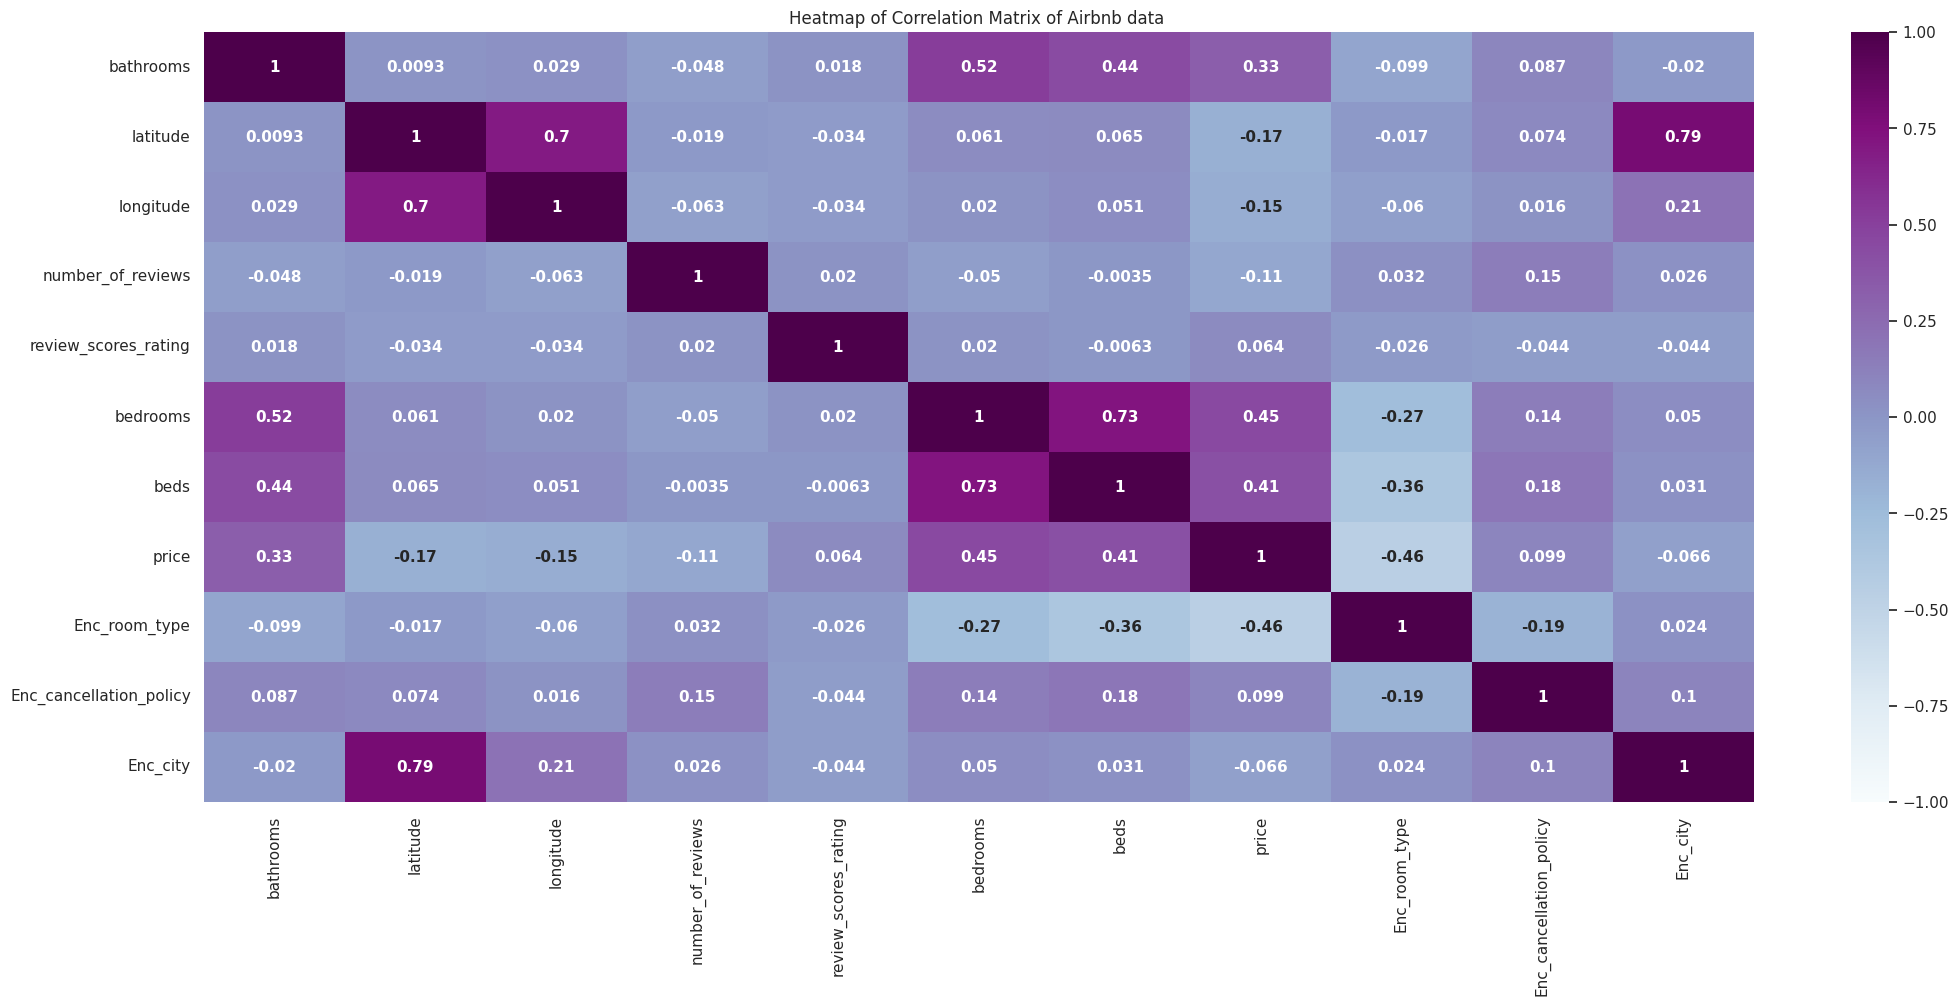

In [ ]:
corr_matrix = airbnb_df[numeric_cols[2:]].corr().round(4)
plt.rcParams['figure.figsize'] = [25, 10]
sns.heatmap(corr_matrix, cmap='BuPu', vmin=-1, vmax=1, annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.title('Heatmap of Correlation Matrix of Airbnb data ')
plt.show()

De esta matriz podemos ver que las variables ‘beds’, ‘bedrooms’ y ‘bathrooms’ se encuentran altamente relacionadas con el precio y que variable ‘room_type’ tiene una relación inversa, es decir cuanto mayor valor tome la variable (shared rooms), menor será el precio.


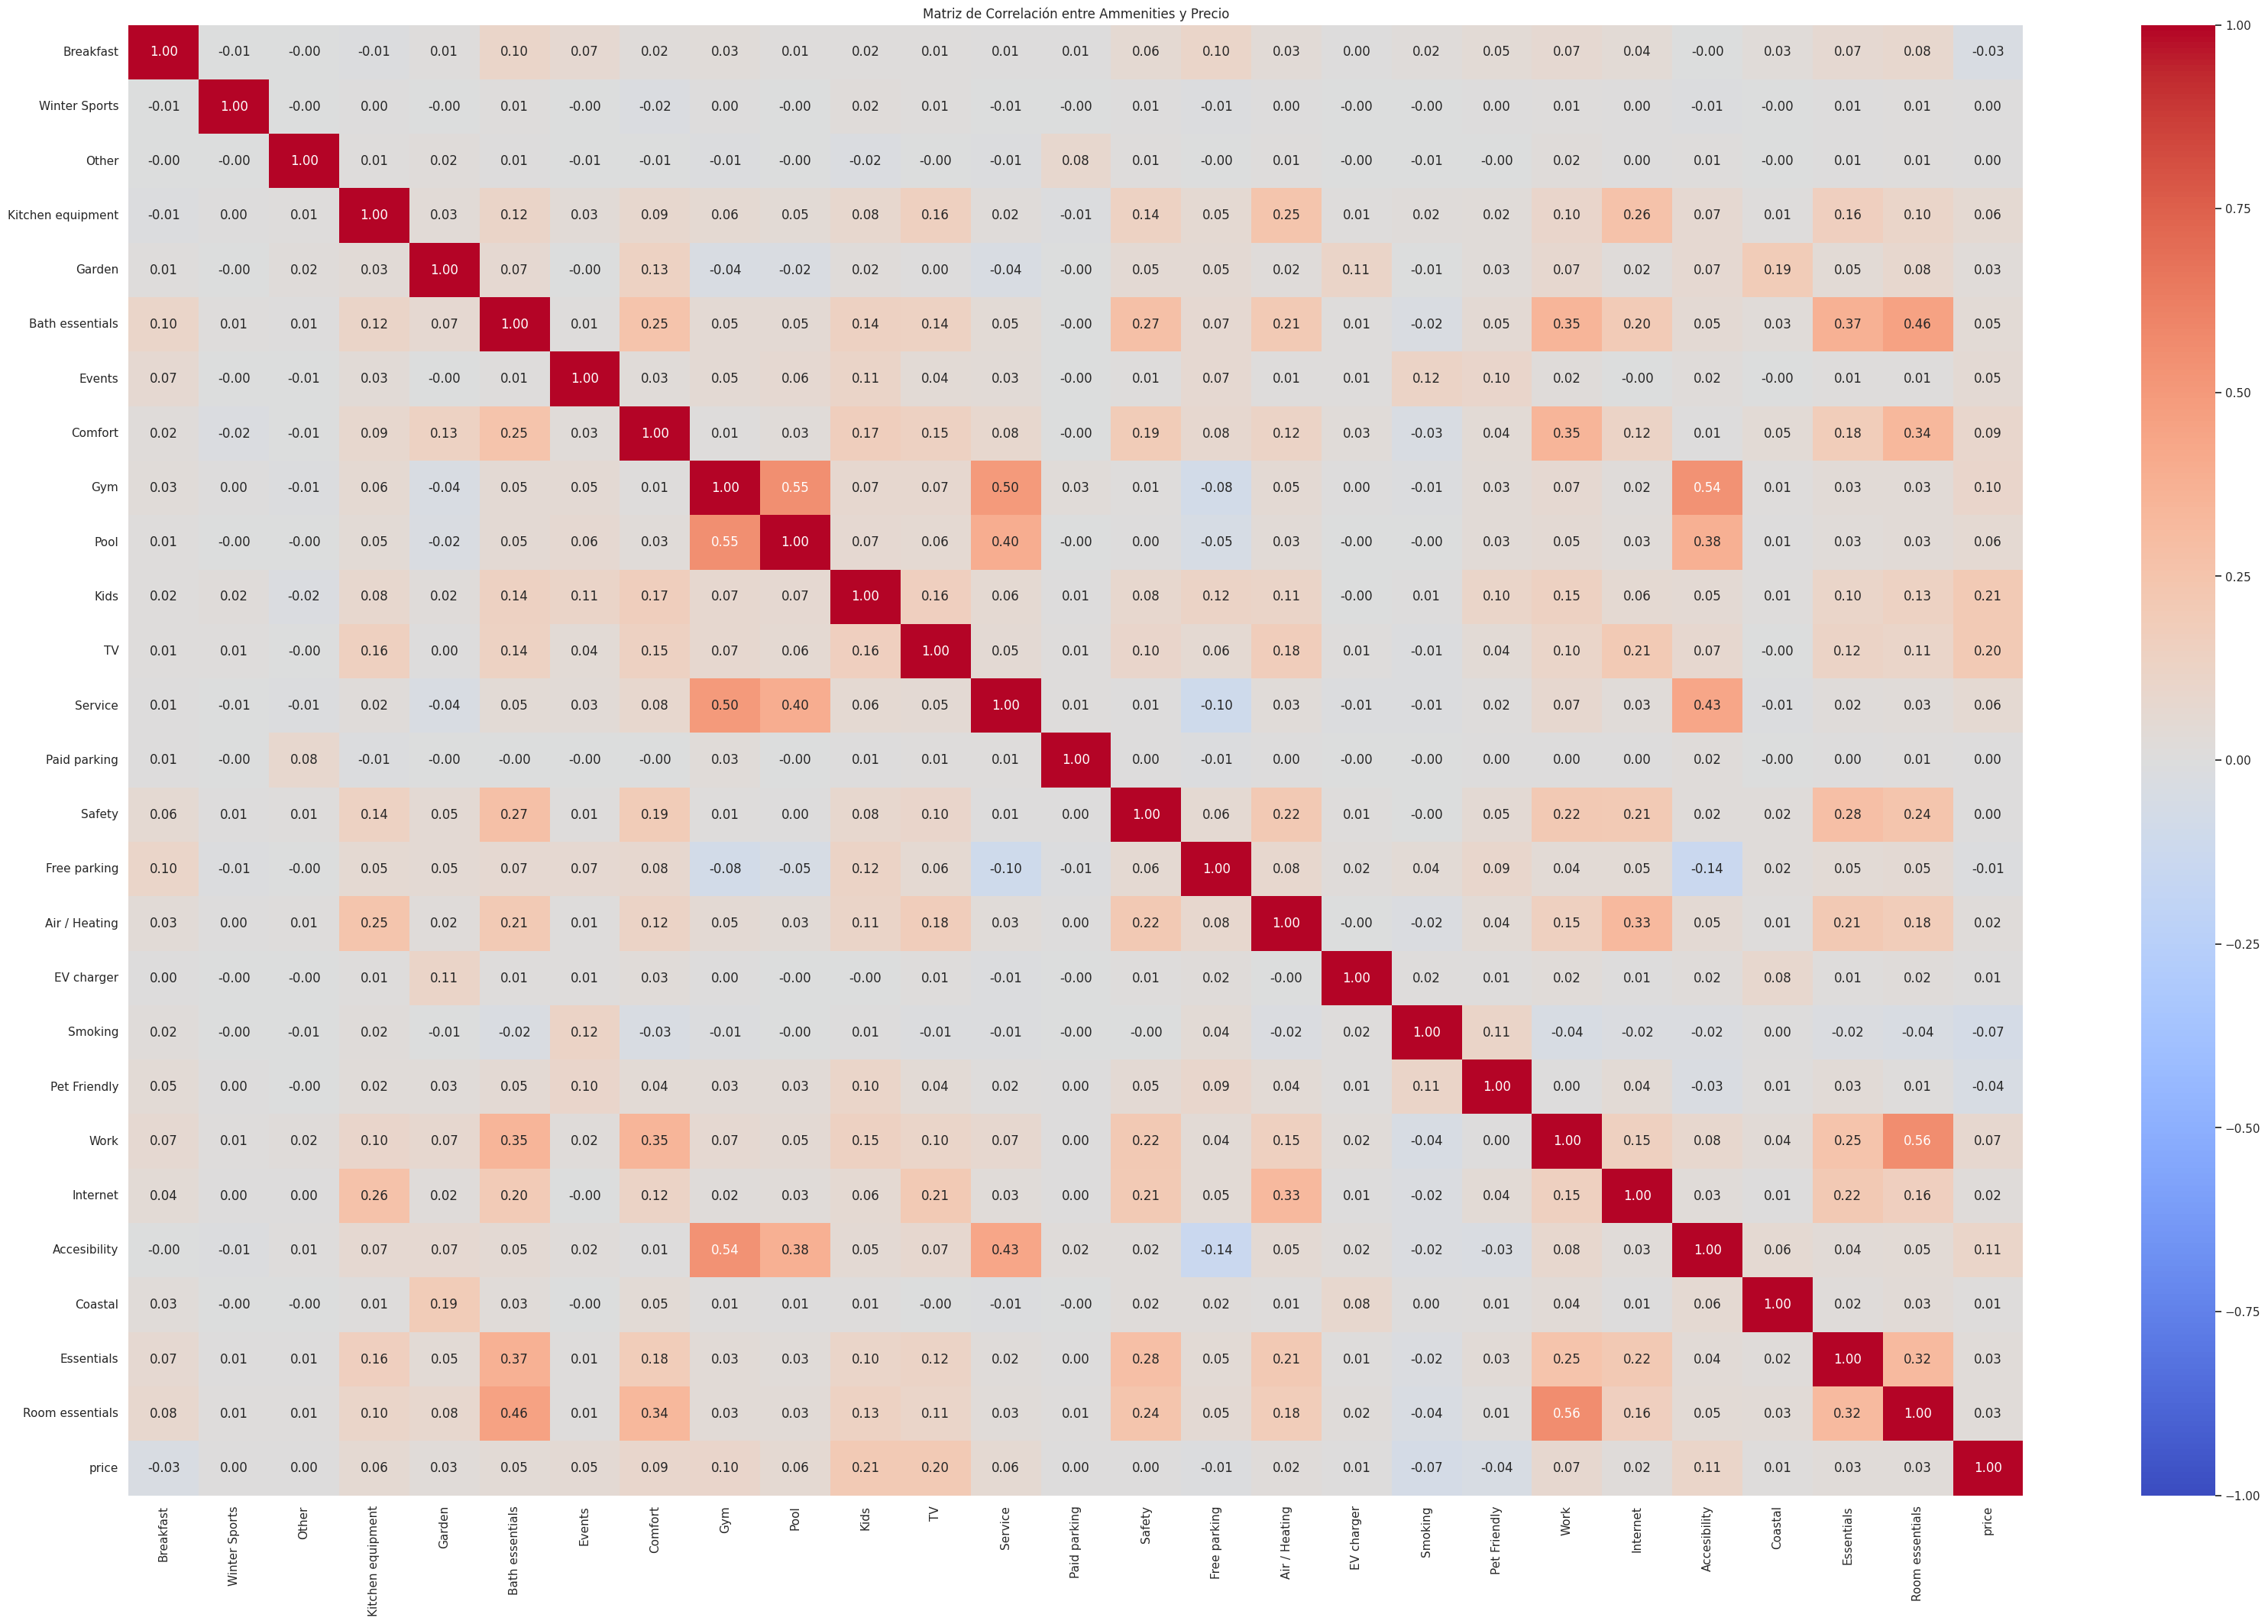

In [ ]:
categories.discard('Error')

# Seleccionamos las columnas dummy y 'price'
dummy_columns = list(categories)  # O usa las columnas específicas si las tienes
columns_to_corr = dummy_columns + ['price']

# Calculamos la matriz de correlación
correlation_matrix = airbnb_df[columns_to_corr].corr()

# Crear el mapa de calor
plt.figure(figsize=(40, 25))  # Ajusta el tamaño de la figura si es necesario
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt=".2f", cbar=True)

# Mostrar el gráfico
plt.title("Matriz de Correlación entre Ammenities y Precio")
plt.show()

De esta matriz obtenemos que las amenities dentro de las categorías ‘Kids’, ‘TV’, ‘Gym’ and ‘Accessibility’ se encuentran relacionadas con el precio.

In [ ]:
# Exportar el DataFrame resultante a un archivo CSV
airbnb_df.to_csv('airbnb-us_EDA.csv', index=False)

# Descargar el archivo CSV para utilizarlo luego en el price prediction
from google.colab import files
files.download('airbnb-us_EDA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>